In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import SimpleITK as sitk
from tqdm import tqdm
from timeit import default_timer as timer
from data_tools.itk import *
plt.rcParams["figure.figsize"] = (20,5)
sitk.ProcessObject_SetGlobalWarningDisplay(False)

In [14]:
# get data dir
TRAIN_DIR = "./data/train/"
OUTPUT_DIR = "./processed/train/"
EXAMPLE = TRAIN_DIR + "00053/FLAIR"

In [12]:
def show_image(im):
    fig, axs = plt.subplots(1,3)
    arr = sitk.GetArrayFromImage(im)
    imax = np.max(arr)

    axs[0].imshow(
        arr[arr.shape[0]//2,:,:],
        aspect='auto', vmax=imax, origin='lower')
    axs[0].set_title("normal 0")
    axs[1].imshow(
        arr[:,arr.shape[1]//2,:],
        aspect='auto', vmax=imax, origin='lower')
    axs[1].set_title("normal 1")
    axs[2].imshow(
        arr[:,:,arr.shape[2]//2],
        aspect='auto', vmax=imax, origin='lower')
    axs[2].set_title("normal 2")
    fig.show()

80.29899625500002


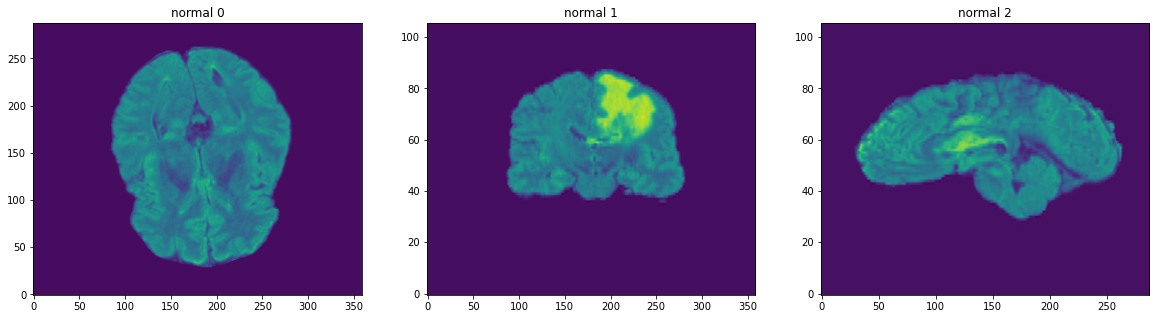

In [21]:
safe_make_dir(OUTPUT_DIR)
start = timer()
X = process_image(EXAMPLE, 
      [0.7121478558063163, 0.8886607742498911, 2.4320288976061724])
end = timer() 
print(end - start)
show_image(X)

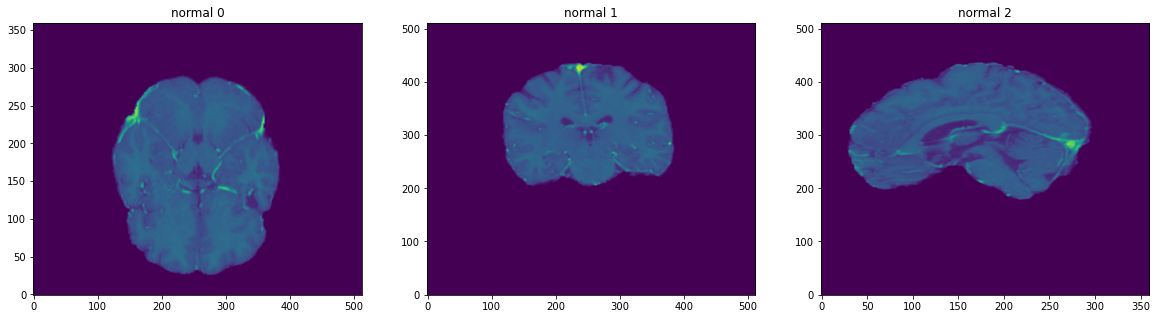

In [10]:
X = process_image(TRAIN_DIR + "00009/T1wCE")
show_image(X)

In [ ]:
show_image(image)

In [ ]:
# define more helpers

def safe_make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
pix = sitk.GetArrayFromImage(image).flatten()
pix = pix[np.nonzero(pix)]
pix_min = np.min(pix)
pix_max = np.max(pix)

# min max normalize 
pix = (pix - pix_min)/pix_max
print(pix.std())
plt.hist(pix, bins='fd')
plt.show()

In [ ]:
image2 = read_dicom_series(TRAIN_DIR + "00768/FLAIR")
image2 = sitk.RescaleIntensity(image2, 0, 1)
# correctedImage2 = n4_bias_correction(image2)
pix = sitk.GetArrayFromImage(image2).flatten()
pix = pix[np.nonzero(pix)]
pix_min = np.min(pix)
pix_max = np.max(pix)

# min max normalize 
# pix = (pix - pix_min)/pix_max
print(pix.std())
plt.hist(pix, bins='fd')
plt.show()

In [ ]:
show_image(image)

In [ ]:
show_image(image2)

In [ ]:
n4image = n4_bias_correction(image)
n4image2 = n4_bias_correction(image2)

In [ ]:
show_image(n4image)

In [ ]:
show_image(n4image2)

In [29]:
X.GetSpacing()

(0.9375, 0.9375, 3.0)